In [2]:
# ZAD 3B
# https://en.wikipedia.org/wiki/Newton_fractal

using Images

fn(z) = sin(z) - 1

imagew = 1024
imageh = 512
maxIteration = 200
tolerance = 0.00000001;
znextfun = z -> (z * cos(z) - sin(z) + 1) / cos(z)

#3 (generic function with 1 method)

In [4]:
function color_fun(z, iteration)
    maxIteration_ = 100
    iteration = clamp(iteration, 1, maxIteration_)
    ztmp = z - pi/2
    ztmp = mod(ztmp.re, 2*pi)
    
    difference = min(ztmp, 2*pi - ztmp)
    #println(iteration/maxIteration)
    #println(z, ":=:", difference, ":", iteration)

    if abs(difference) < tolerance && abs(z.im) < tolerance
        return (true, RGB(iteration/maxIteration_, 0, 0))
    end
    return (false, RGB(0,0,0))
end    

color_fun (generic function with 1 method)

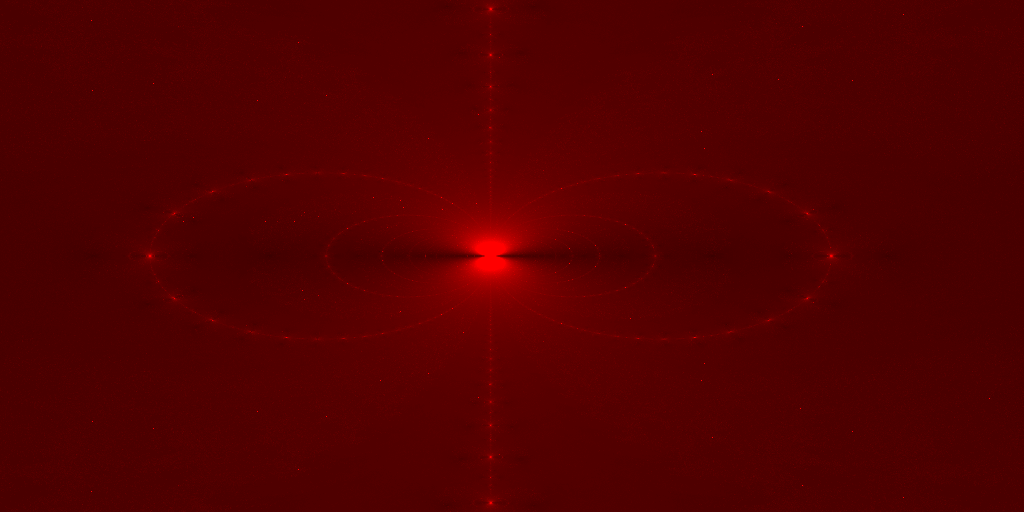

In [5]:
function get_color(x, y, znextfun)
    zx = -2.05 + 1 * ((x-1) / (imagew-1))
    zy = -0.5 + 1 * ((y-1) / (imageh-1))
    z = zx + zy * im
    #println(z, znextfun(z))
    for iteration in 1:maxIteration
        z = znextfun(z)
        (is_color, color) = color_fun(z, iteration)
        if is_color
            return color
        end
    end        
    return RGB(1,0,0)
end

image = zeros(RGB, imageh ,imagew)
for x=1:imagew
    for y=1:imageh
       image[y,x] = get_color(x,y, znextfun)
    end
end

image